In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
from dateutil.parser import parse
import json
from google.colab import files


file_path = "export.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Extract the 'Record' elements (specific to Apple Health data structure)
sleep_data_24 = []
for record in root.findall(".//Record"):
    if record.attrib.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
        start_date = record.attrib.get('startDate')  # Get the startDate attribute
        end_date = record.attrib.get('endDate')      # Get the endDate attribute
        value = record.attrib.get('value')          # Sleep analysis value (e.g., in-bed, asleep, etc.)

        # Filter for the year 2024
        if start_date and parse(start_date).year == 2024:
            sleep_data_24.append({
                'Start Date': start_date,
                'End Date': end_date,
                'Sleep Value': value
            })

# Convert to a DataFrame for easier manipulation and visualization
df = pd.DataFrame(sleep_data_24)

# Convert 'Start Date' and 'End Date' columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Calculate sleep duration in hours
df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600

# Group by day and sum sleep durations
daily_sleep_24 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_24.rename(columns={'Start Date': 'Day'}, inplace=True)

# Display the DataFrame in Colab
print(daily_sleep_24)


            Day  Sleep Duration (hours)
0    2024-01-01                5.399722
1    2024-01-02                4.309444
2    2024-01-03                6.211667
3    2024-01-04                5.900000
4    2024-01-05                5.588056
..          ...                     ...
182  2024-09-11                7.083333
183  2024-09-12                7.083889
184  2024-09-13                6.367500
185  2024-09-16                7.083333
186  2024-09-17                6.756667

[187 rows x 2 columns]


In [ ]:
df = pd.DataFrame(sleep_data_24)


df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])


df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600


daily_sleep_24 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_24.rename(columns={'Start Date': 'Day'}, inplace=True)


print(daily_sleep_24)

            Day  Sleep Duration (hours)
0    2024-01-01                5.399722
1    2024-01-02                4.309444
2    2024-01-03                6.211667
3    2024-01-04                5.900000
4    2024-01-05                5.588056
..          ...                     ...
182  2024-09-11                7.083333
183  2024-09-12                7.083889
184  2024-09-13                6.367500
185  2024-09-16                7.083333
186  2024-09-17                6.756667

[187 rows x 2 columns]


i realized the data for 2024 is not collected fully so i did it for also 2023

In [ ]:

file_path = "export.xml"
tree = ET.parse(file_path)
root = tree.getroot()


sleep_data_23 = []
for record in root.findall(".//Record"):
    if record.attrib.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
        start_date = record.attrib.get('startDate')
        end_date = record.attrib.get('endDate')
        value = record.attrib.get('value')

        # Filter for the year 2023
        if start_date and parse(start_date).year == 2023:
            sleep_data_23.append({
                'Start Date': start_date,
                'End Date': end_date,
                'Sleep Value': value
            })


df = pd.DataFrame(sleep_data_23)

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])


df['Sleep Duration (hours)'] = (df['End Date'] - df['Start Date']).dt.total_seconds() / 3600


daily_sleep_23 = df.groupby(df['Start Date'].dt.date)['Sleep Duration (hours)'].sum().reset_index()
daily_sleep_23.rename(columns={'Start Date': 'Day'}, inplace=True)

print(daily_sleep_23)


            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
254  2023-12-25                5.391667
255  2023-12-26                6.630833
256  2023-12-27                6.228056
257  2023-12-28                5.754167
258  2023-12-29                5.787222

[259 rows x 2 columns]


In [ ]:

merged_sleep_data = pd.concat([daily_sleep_23, daily_sleep_24], ignore_index=True)


merged_sleep_data.sort_values(by='Day', inplace=True)


merged_sleep_data.reset_index(drop=True, inplace=True)

print(merged_sleep_data)


            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]


In [ ]:
data_sleep = merged_sleep_data

In [ ]:
print(data_sleep)

            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]


i realized some missing values i fill them with average

<ipython-input-16-06bf3e1dc3b8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_sleep_data['Sleep Duration (hours)'].fillna(average_sleep_duration, inplace=True)


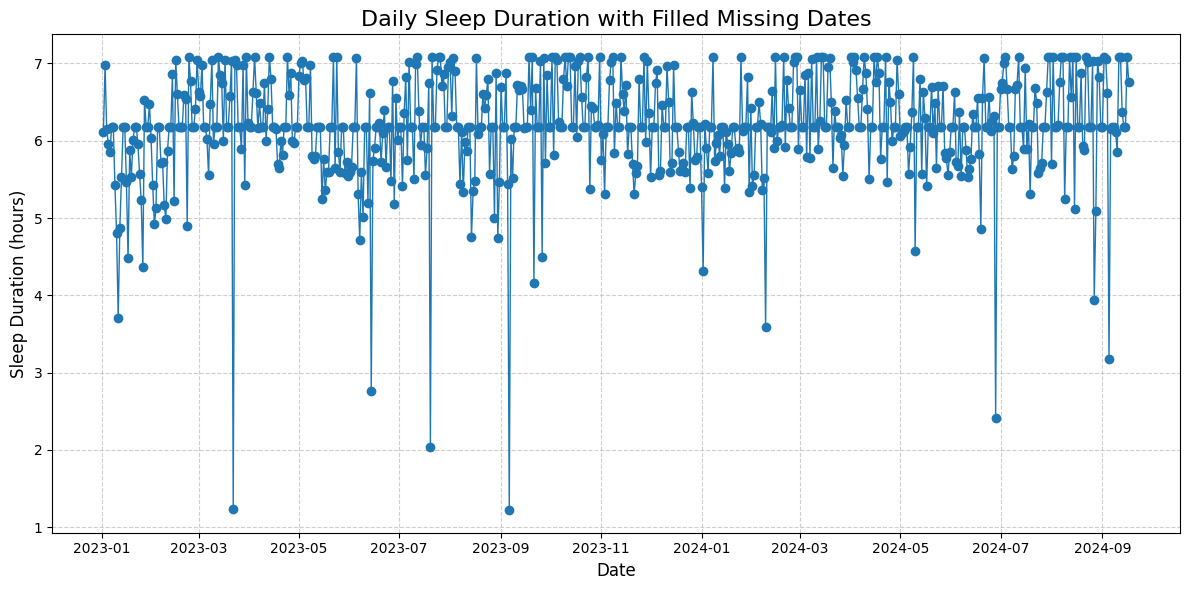

In [ ]:
import matplotlib.pyplot as plt

merged_sleep_data['Day'] = pd.to_datetime(merged_sleep_data['Day'])


date_range = pd.date_range(start=merged_sleep_data['Day'].min(), end=merged_sleep_data['Day'].max())

merged_sleep_data = merged_sleep_data.set_index('Day').reindex(date_range)

merged_sleep_data.index.name = 'Day'

average_sleep_duration = merged_sleep_data['Sleep Duration (hours)'].mean()
merged_sleep_data['Sleep Duration (hours)'].fillna(average_sleep_duration, inplace=True)

merged_sleep_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(merged_sleep_data['Day'], merged_sleep_data['Sleep Duration (hours)'], marker='o', linestyle='-', linewidth=1)
plt.title('Daily Sleep Duration with Filled Missing Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


My sleep data is ready

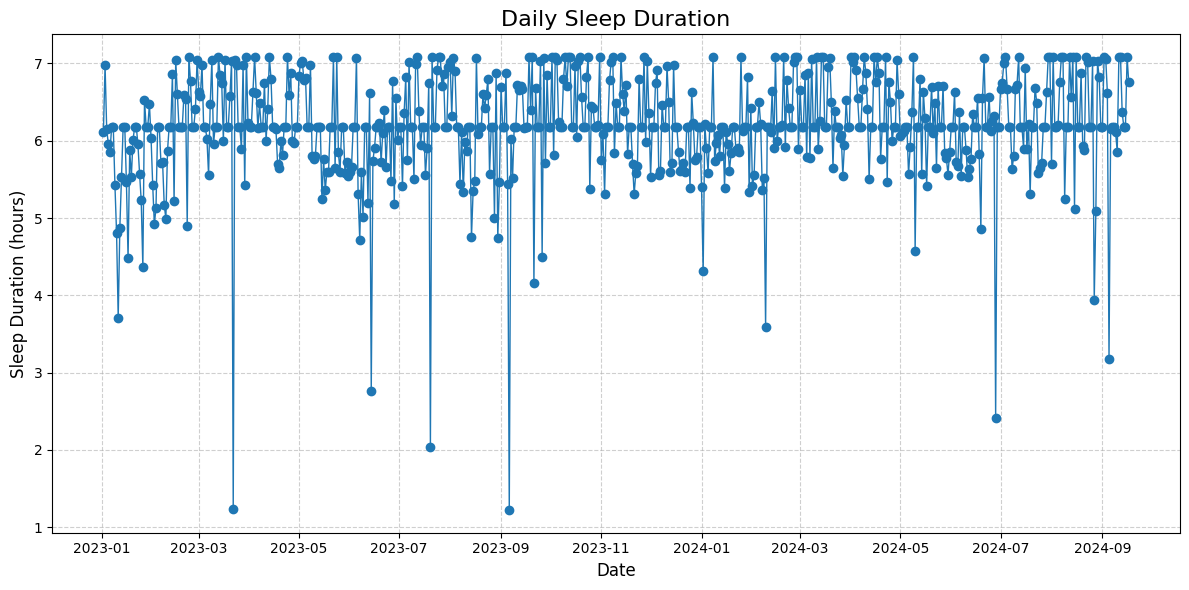

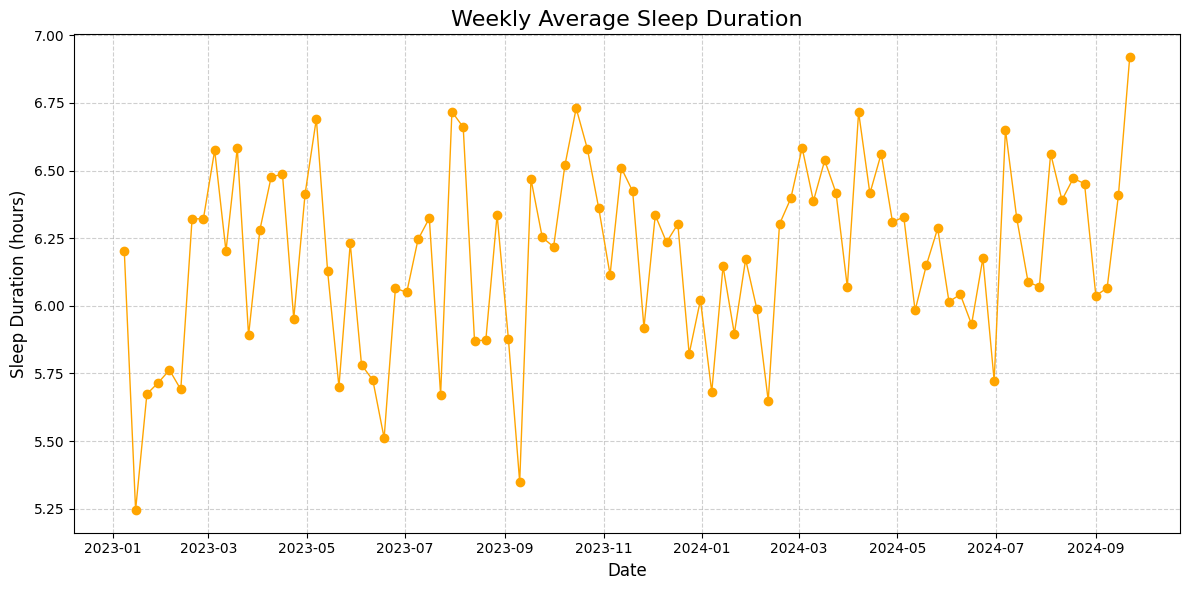

<ipython-input-17-70cfa5020e9d>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('M').mean()


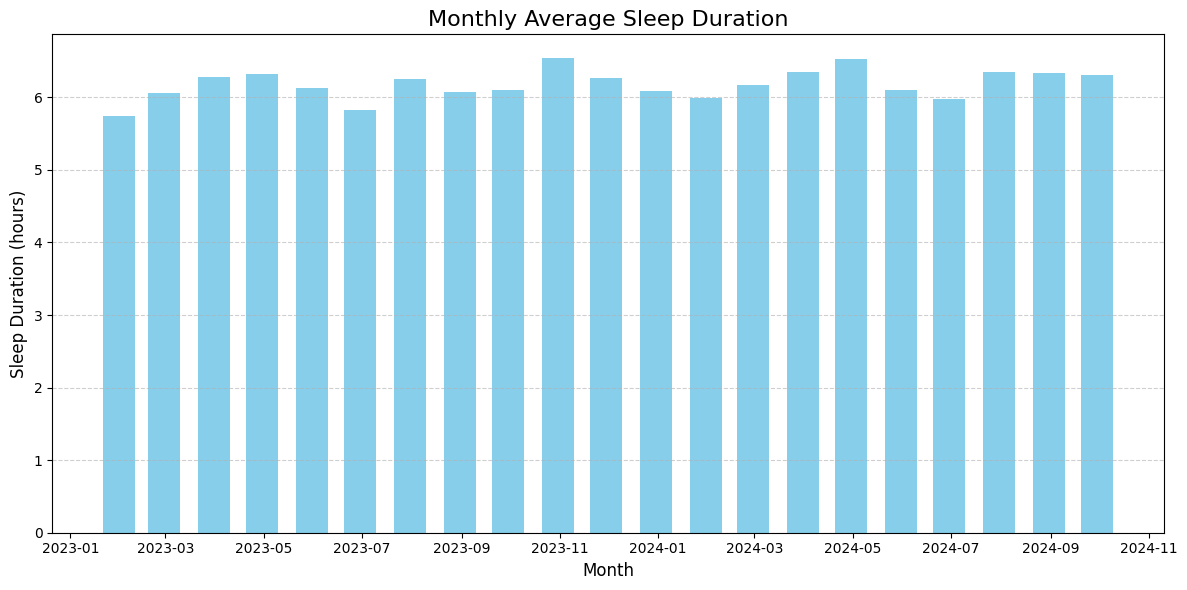

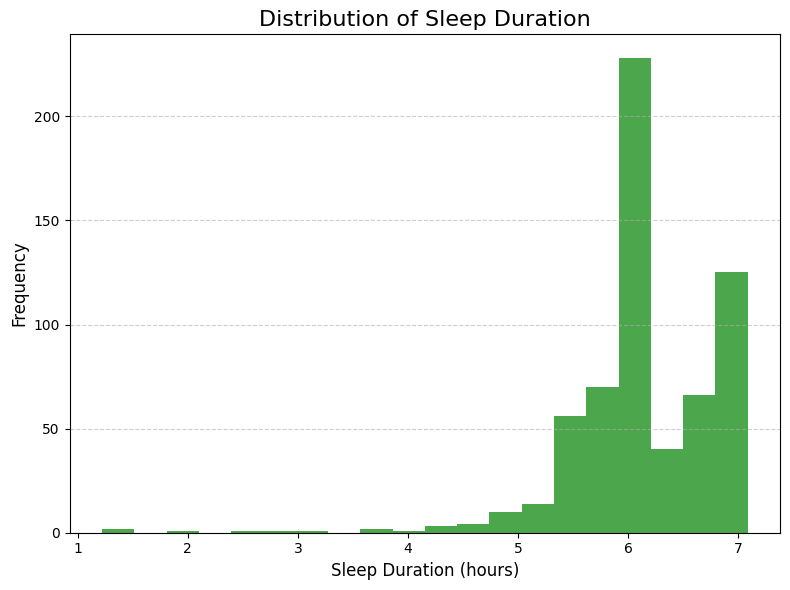

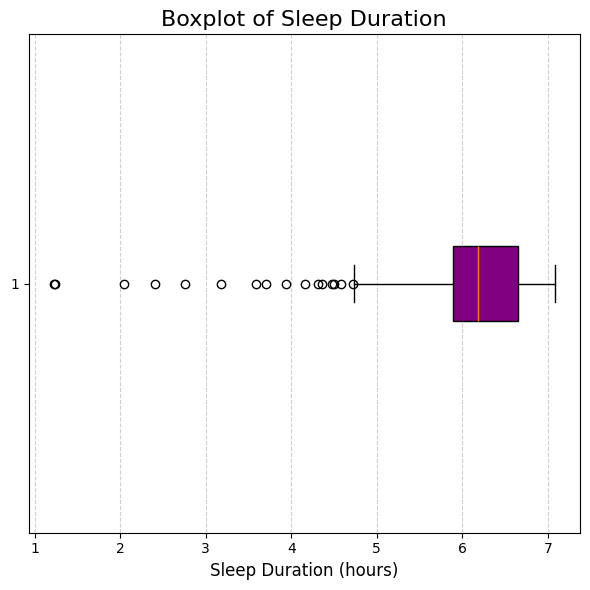

In [ ]:
# Convert 'Day' to datetime for proper resampling
merged_sleep_data['Day'] = pd.to_datetime(merged_sleep_data['Day'])
merged_sleep_data.set_index('Day', inplace=True)

# Daily sleep duration
plt.figure(figsize=(12, 6))
plt.plot(merged_sleep_data.index, merged_sleep_data['Sleep Duration (hours)'], marker='o', linestyle='-', linewidth=1)
plt.title('Daily Sleep Duration', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Weekly average sleep duration
weekly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sleep.index, weekly_sleep, marker='o', linestyle='-', linewidth=1, color='orange')
plt.title('Weekly Average Sleep Duration', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Monthly average sleep duration
monthly_sleep = merged_sleep_data['Sleep Duration (hours)'].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.bar(monthly_sleep.index, monthly_sleep, color='skyblue', width=20)
plt.title('Monthly Average Sleep Duration', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sleep duration distribution
plt.figure(figsize=(8, 6))
plt.hist(merged_sleep_data['Sleep Duration (hours)'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Boxplot for overall sleep duration
plt.figure(figsize=(6, 6))
plt.boxplot(merged_sleep_data['Sleep Duration (hours)'], vert=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.title('Boxplot of Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
file_name = "Streaming_History_Audio_2022-2024_3.json"


data = []

with open(file_name, 'r') as file:
    json_data = json.load(file)
    data.extend(json_data)


spotify_data = pd.DataFrame(data)



In [ ]:
print(spotify_data)

                         ts                 platform  ms_played conn_country  \
0      2022-06-15T17:33:13Z  iOS 13.3.1 (iPhone11,8)       3477           TR   
1      2022-06-15T17:37:27Z  iOS 13.3.1 (iPhone11,8)     255346           TR   
2      2022-06-15T17:57:15Z  iOS 13.3.1 (iPhone11,8)     280277           TR   
3      2022-06-15T17:59:58Z  iOS 13.3.1 (iPhone11,8)     164000           TR   
4      2022-06-15T18:55:32Z  iOS 13.3.1 (iPhone11,8)     211478           TR   
...                     ...                      ...        ...          ...   
15979  2024-12-26T19:02:55Z                      ios     131368           TR   
15980  2024-12-26T19:13:44Z                      ios     258342           TR   
15981  2024-12-26T19:16:36Z                      ios     159822           TR   
15982  2024-12-26T19:18:08Z                      ios      90573           TR   
15983  2024-12-26T19:20:10Z                      ios     111141           TR   

             ip_addr        master_meta

i get only relevant columns

In [ ]:
spotify_data = spotify_data[['ts', 'ms_played', 'master_metadata_album_artist_name', 'master_metadata_track_name', 'spotify_track_uri']]

print(spotify_data)


                         ts  ms_played master_metadata_album_artist_name  \
0      2022-06-15T17:33:13Z       3477                             Model   
1      2022-06-15T17:37:27Z     255346                             Model   
2      2022-06-15T17:57:15Z     280277                             Model   
3      2022-06-15T17:59:58Z     164000                               UZI   
4      2022-06-15T18:55:32Z     211478                             maNga   
...                     ...        ...                               ...   
15979  2024-12-26T19:02:55Z     131368                          Boramess   
15980  2024-12-26T19:13:44Z     258342                        Macklemore   
15981  2024-12-26T19:16:36Z     159822                        Sezen Aksu   
15982  2024-12-26T19:18:08Z      90573                        Sezen Aksu   
15983  2024-12-26T19:20:10Z     111141                             Yalın   

             master_metadata_track_name                     spotify_track_uri  
0      

In [ ]:
spotify_data['Day'] = pd.to_datetime(spotify_data['ts']).dt.date

processed_data = spotify_data[['Day', 'spotify_track_uri', 'ms_played', 'master_metadata_album_artist_name', 'master_metadata_track_name']]

processed_data.set_index(['Day', 'spotify_track_uri'], inplace=True)

print(processed_data)

                                                 ms_played  \
Day        spotify_track_uri                                 
2022-06-15 spotify:track:1cwth5tNynCfH2ZYCmShDc       3477   
           spotify:track:1cwth5tNynCfH2ZYCmShDc     255346   
           spotify:track:2Tv2XmPGs0A8esmc4gBkX4     280277   
           spotify:track:6gxLEbRJlorva6uVRW4gof     164000   
           spotify:track:110lLYj8VghNryOewSj15h     211478   
...                                                    ...   
2024-12-26 spotify:track:6s0WUuPlnK8JTcBEhLw6pp     131368   
           spotify:track:3bidbhpOYeV4knp8AIu8Xn     258342   
           spotify:track:0x9154bA7PgqF6Za1CtszP     159822   
           spotify:track:0x9154bA7PgqF6Za1CtszP      90573   
           spotify:track:1jhnbRVTmRJjnRhabesRqn     111141   

                                                master_metadata_album_artist_name  \
Day        spotify_track_uri                                                        
2022-06-15 spotify:trac

In [ ]:
spotify_data['Day'] = pd.to_datetime(spotify_data['ts']).dt.date
data_sleep['Day'] = pd.to_datetime(data_sleep['Day']).dt.date

filtered_spotify_data = spotify_data[spotify_data['Day'].isin(data_sleep['Day'])]

print(filtered_spotify_data)

                         ts  ms_played master_metadata_album_artist_name  \
4410   2023-01-02T15:04:41Z     152053                        Chet Faker   
4411   2023-01-02T15:06:03Z      73623                Stanley Turrentine   
4412   2023-01-02T15:06:06Z       1787                        Tanju Okan   
4413   2023-01-02T15:06:12Z       6339                     Belkıs Özener   
4414   2023-01-02T15:06:24Z      11447                          Boramess   
...                     ...        ...                               ...   
13013  2024-09-17T18:02:34Z       1478                           ALIZADE   
13014  2024-09-17T18:02:38Z       4270                           ALIZADE   
13015  2024-09-17T18:04:31Z     112590                           ALIZADE   
13016  2024-09-17T20:15:49Z     159961                           ALIZADE   
13017  2024-09-17T20:18:31Z     162711                           ALIZADE   

        master_metadata_track_name                     spotify_track_uri  \
4410       

In [ ]:
sleep = data_sleep.copy()
spotify = filtered_spotify_data.copy()

In [ ]:
spotify['minutes_played'] = spotify['ms_played'] / (1000 * 60)

spotify_time = spotify.groupby('Day')['minutes_played'].sum().reset_index()

spotify_time.columns = ['Day', 'Daily Minutes Played']

print(spotify_time)


            Day  Daily Minutes Played
0    2023-01-02             53.282967
1    2023-01-03             14.998250
2    2023-01-04              8.699750
3    2023-01-05             15.891917
4    2023-01-09             21.436417
..          ...                   ...
341  2024-09-11             11.354383
342  2024-09-12             37.957633
343  2024-09-13             47.469383
344  2024-09-16             56.519283
345  2024-09-17            137.486933

[346 rows x 2 columns]


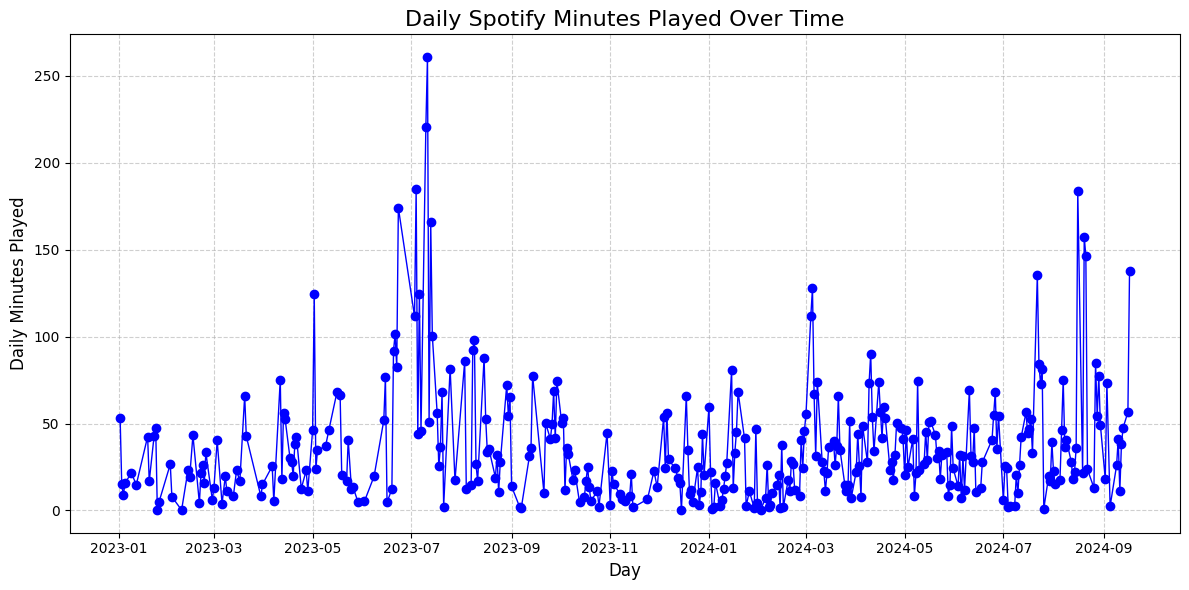

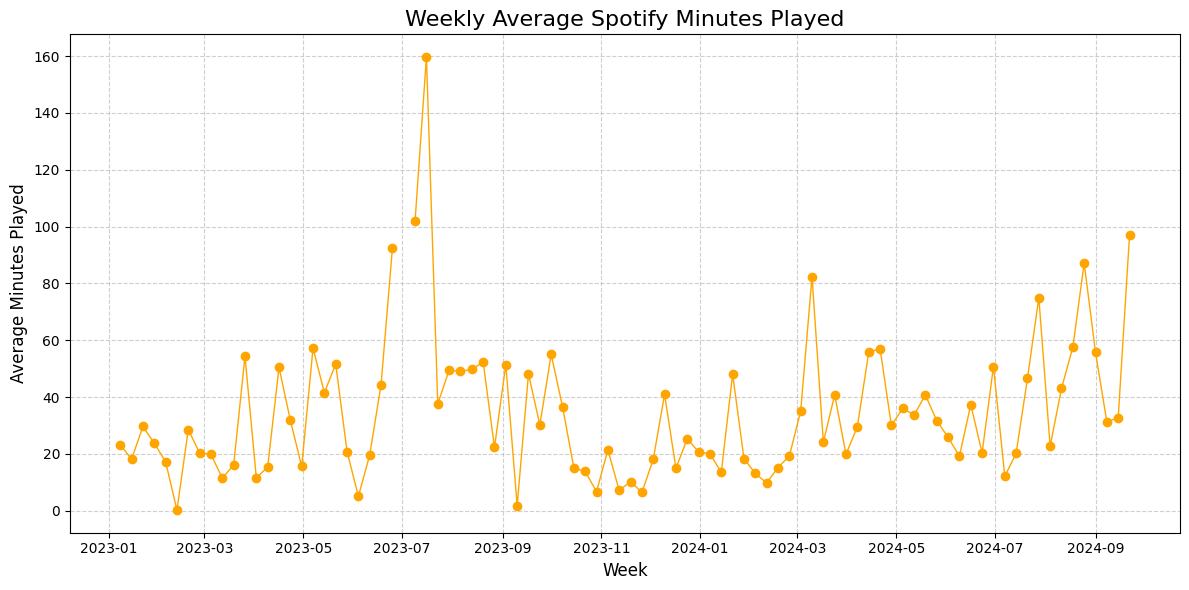

<ipython-input-21-8e82f330fce5>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_minutes = spotify_time['Daily Minutes Played'].resample('M').sum()


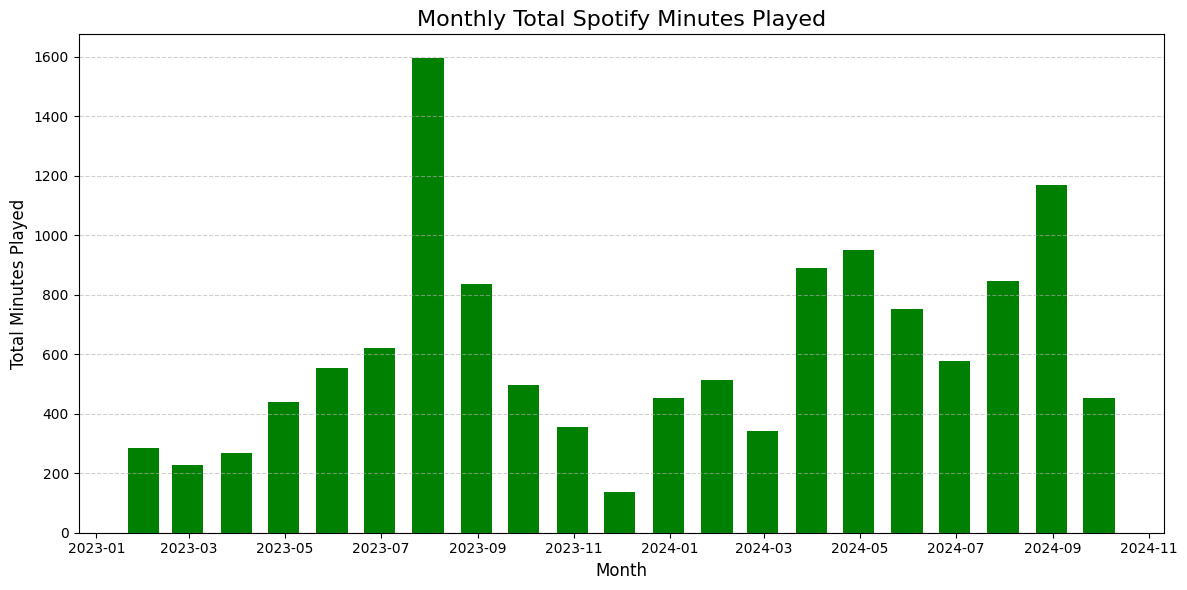

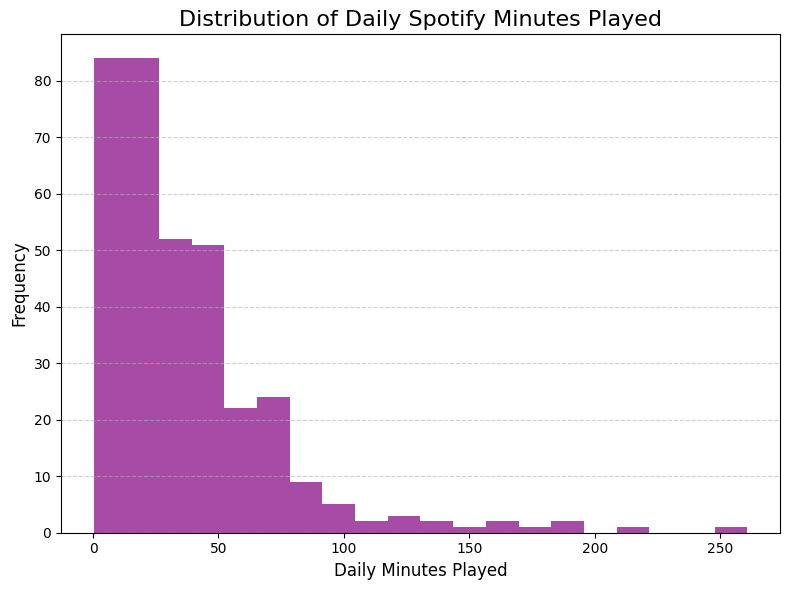

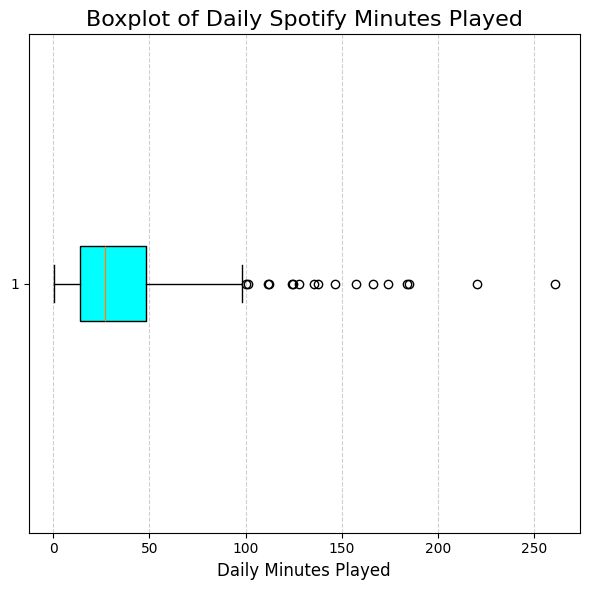

In [ ]:
# Plot daily minutes played over time
plt.figure(figsize=(12, 6))
plt.plot(spotify_time['Day'], spotify_time['Daily Minutes Played'], marker='o', linestyle='-', linewidth=1, color='blue')
plt.title('Daily Spotify Minutes Played Over Time', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Daily Minutes Played', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Weekly average of minutes played
spotify_time['Day'] = pd.to_datetime(spotify_time['Day'])
spotify_time.set_index('Day', inplace=True)
weekly_minutes = spotify_time['Daily Minutes Played'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_minutes.index, weekly_minutes, marker='o', linestyle='-', linewidth=1, color='orange')
plt.title('Weekly Average Spotify Minutes Played', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Minutes Played', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Monthly total minutes played
monthly_minutes = spotify_time['Daily Minutes Played'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_minutes.index, monthly_minutes, color='green', width=20)
plt.title('Monthly Total Spotify Minutes Played', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Minutes Played', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Distribution of daily minutes played
plt.figure(figsize=(8, 6))
plt.hist(spotify_time['Daily Minutes Played'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Daily Spotify Minutes Played', fontsize=16)
plt.xlabel('Daily Minutes Played', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Boxplot of daily minutes played
plt.figure(figsize=(6, 6))
plt.boxplot(spotify_time['Daily Minutes Played'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan', color='black'))
plt.title('Boxplot of Daily Spotify Minutes Played', fontsize=16)
plt.xlabel('Daily Minutes Played', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
spotify.rename(columns={
    'ts': 'Timestamp',
    'ms_played': 'Milliseconds Played',
    'master_metadata_album_artist_name': 'Artist Name',
    'master_metadata_track_name': 'Track Name',
    'spotify_track_uri': 'Track URI',
    'Day': 'Date',
    'minutes_played': 'Minutes Played'
}, inplace=True)

print(spotify)


                  Timestamp  Milliseconds Played         Artist Name  \
4410   2023-01-02T15:04:41Z               152053          Chet Faker   
4411   2023-01-02T15:06:03Z                73623  Stanley Turrentine   
4412   2023-01-02T15:06:06Z                 1787          Tanju Okan   
4413   2023-01-02T15:06:12Z                 6339       Belkıs Özener   
4414   2023-01-02T15:06:24Z                11447            Boramess   
...                     ...                  ...                 ...   
13013  2024-09-17T18:02:34Z                 1478             ALIZADE   
13014  2024-09-17T18:02:38Z                 4270             ALIZADE   
13015  2024-09-17T18:04:31Z               112590             ALIZADE   
13016  2024-09-17T20:15:49Z               159961             ALIZADE   
13017  2024-09-17T20:18:31Z               162711             ALIZADE   

                        Track Name                             Track URI  \
4410                    No Diggity  spotify:track:0PB8KUQHp

In [ ]:
print(spotify_time)

            Daily Minutes Played
Day                             
2023-01-02             53.282967
2023-01-03             14.998250
2023-01-04              8.699750
2023-01-05             15.891917
2023-01-09             21.436417
...                          ...
2024-09-11             11.354383
2024-09-12             37.957633
2024-09-13             47.469383
2024-09-16             56.519283
2024-09-17            137.486933

[346 rows x 1 columns]


In [ ]:
print(sleep)

            Day  Sleep Duration (hours)
0    2023-01-02                6.117778
1    2023-01-03                6.977222
2    2023-01-04                6.146111
3    2023-01-05                5.958056
4    2023-01-06                5.853611
..          ...                     ...
441  2024-09-11                7.083333
442  2024-09-12                7.083889
443  2024-09-13                6.367500
444  2024-09-16                7.083333
445  2024-09-17                6.756667

[446 rows x 2 columns]


In [ ]:
# Check column names
print(spotify_time.columns)
print(sleep.columns)


Index(['Daily Minutes Played'], dtype='object')
Index(['Day', 'Sleep Duration (hours)'], dtype='object')


In [ ]:
# Ensure the 'Day' column in both dataframes is in datetime format
sleep['Day'] = pd.to_datetime(sleep['Day'])

# Merge the datasets on 'Day'
merged_data = pd.merge(spotify_time, sleep, on='Day', how='inner')

# Display the merged dataset
print(merged_data.head())


         Day  Daily Minutes Played  Sleep Duration (hours)
0 2023-01-02             53.282967                6.117778
1 2023-01-03             14.998250                6.977222
2 2023-01-04              8.699750                6.146111
3 2023-01-05             15.891917                5.958056
4 2023-01-09             21.436417                5.430000


In [ ]:
print(merged_data)

           Day  Daily Minutes Played  Sleep Duration (hours)
0   2023-01-02             53.282967                6.117778
1   2023-01-03             14.998250                6.977222
2   2023-01-04              8.699750                6.146111
3   2023-01-05             15.891917                5.958056
4   2023-01-09             21.436417                5.430000
..         ...                   ...                     ...
341 2024-09-11             11.354383                7.083333
342 2024-09-12             37.957633                7.083889
343 2024-09-13             47.469383                6.367500
344 2024-09-16             56.519283                7.083333
345 2024-09-17            137.486933                6.756667

[346 rows x 3 columns]


Summary Statistics:
                       Day  Daily Minutes Played  Sleep Duration (hours)
count                  346            346.000000              346.000000
mean   2023-12-13 12:00:00             36.871710                6.199370
min    2023-01-02 00:00:00              0.220433                1.221667
25%    2023-07-19 06:00:00             13.689858                5.734722
50%    2024-01-06 12:00:00             27.070058                6.227778
75%    2024-05-09 18:00:00             48.144200                6.864653
max    2024-09-17 00:00:00            260.819750                7.083889
std                    NaN             35.216662                0.821180


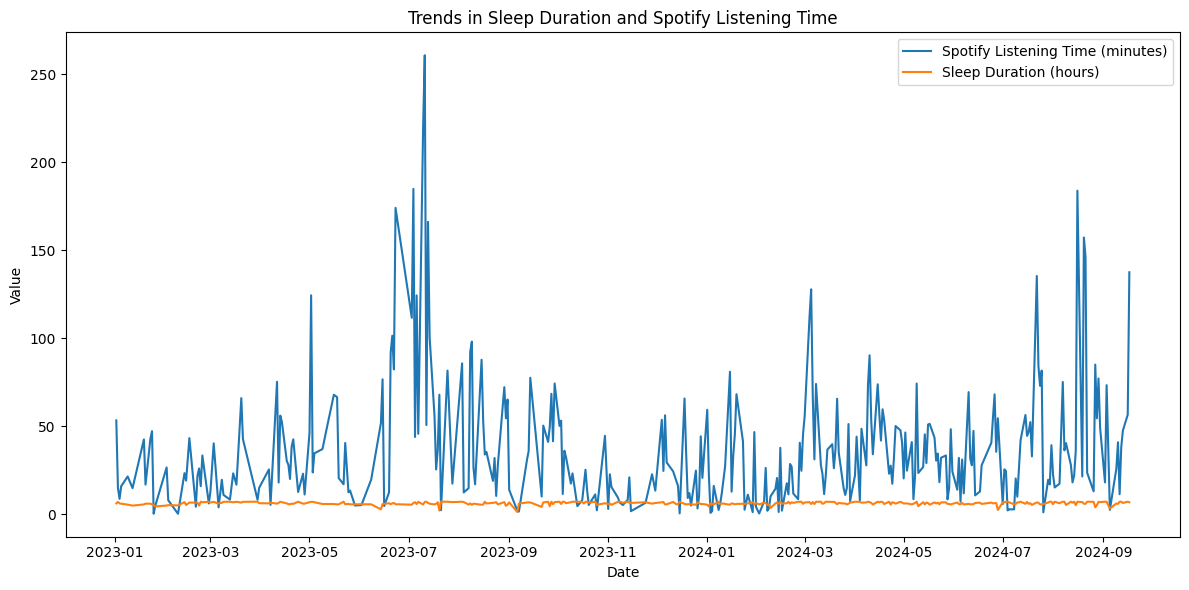

In [ ]:
# Summary Statistics
print("Summary Statistics:")
print(merged_data.describe())

# Plot trends in Sleep Duration and Spotify Listening Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day'], merged_data['Daily Minutes Played'], label='Spotify Listening Time (minutes)')
plt.plot(merged_data['Day'], merged_data['Sleep Duration (hours)'], label='Sleep Duration (hours)')
plt.title("Trends in Sleep Duration and Spotify Listening Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


I realized that one of the variable is in hour format the other is minutes format so, i normalize

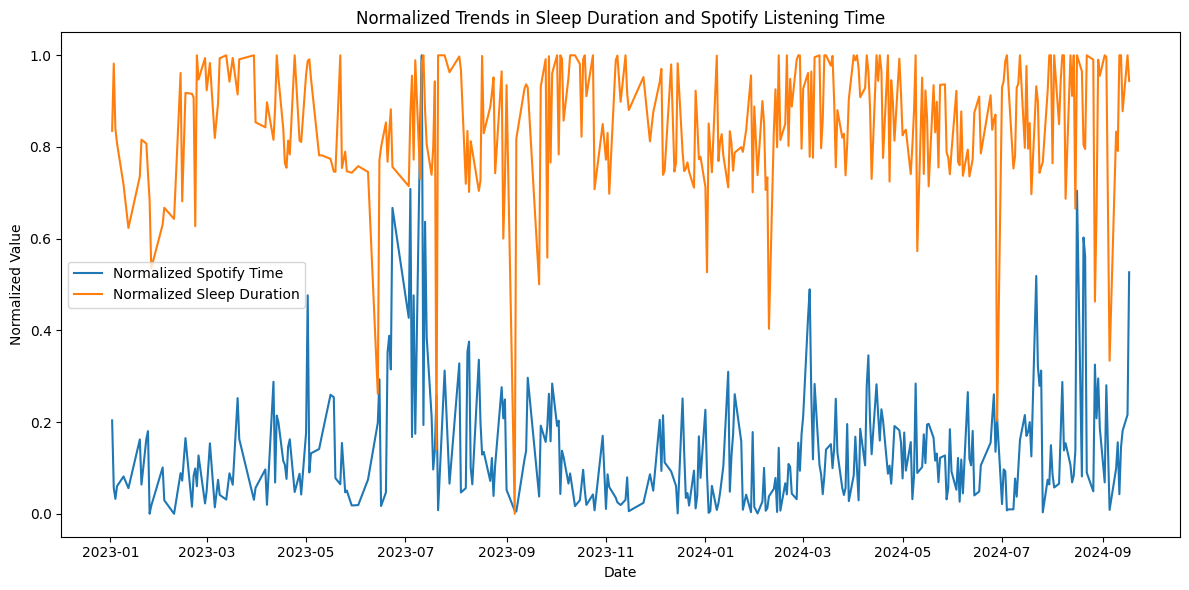

In [ ]:
# Normalize both variables to the 0–1 range
merged_data['Normalized Spotify Time'] = (merged_data['Daily Minutes Played'] - merged_data['Daily Minutes Played'].min()) / (merged_data['Daily Minutes Played'].max() - merged_data['Daily Minutes Played'].min())
merged_data['Normalized Sleep Duration'] = (merged_data['Sleep Duration (hours)'] - merged_data['Sleep Duration (hours)'].min()) / (merged_data['Sleep Duration (hours)'].max() - merged_data['Sleep Duration (hours)'].min())

# Plot normalized data
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day'], merged_data['Normalized Spotify Time'], label='Normalized Spotify Time')
plt.plot(merged_data['Day'], merged_data['Normalized Sleep Duration'], label='Normalized Sleep Duration')
plt.title("Normalized Trends in Sleep Duration and Spotify Listening Time")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.tight_layout()
plt.show()


I move to part Statistical Analysis


Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

# Pearson Correlation
correlation, p_value = pearsonr(merged_data['Sleep Duration (hours)'], merged_data['Daily Minutes Played'])
print(f"Pearson Correlation: {correlation:.4f}, P-Value: {p_value:.4f}")


Pearson Correlation: 0.0068, P-Value: 0.8993


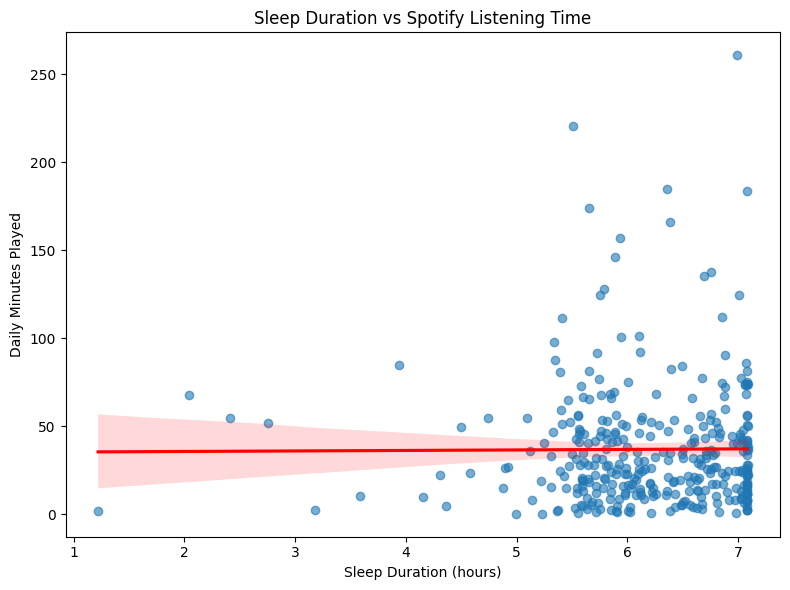

In [ ]:
import seaborn as sns

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Sleep Duration (hours)',
    y='Daily Minutes Played',
    data=merged_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Sleep Duration vs Spotify Listening Time")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Daily Minutes Played")
plt.tight_layout()
plt.show()


T-Test

In [ ]:
from scipy.stats import ttest_ind

# Calculate average sleep duration
average_sleep = merged_data['Sleep Duration (hours)'].mean()

# Split data into below- and above-average sleep groups
below_avg_sleep = merged_data[merged_data['Sleep Duration (hours)'] < average_sleep]['Daily Minutes Played']
above_avg_sleep = merged_data[merged_data['Sleep Duration (hours)'] >= average_sleep]['Daily Minutes Played']

# Perform T-Test
t_stat, t_p_value = ttest_ind(below_avg_sleep, above_avg_sleep, nan_policy='omit')
print(f"T-Test: T-Statistic: {t_stat:.4f}, P-Value: {t_p_value:.4f}")


T-Test: T-Statistic: 0.2015, P-Value: 0.8404


<ipython-input-36-ecb5f6b10302>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


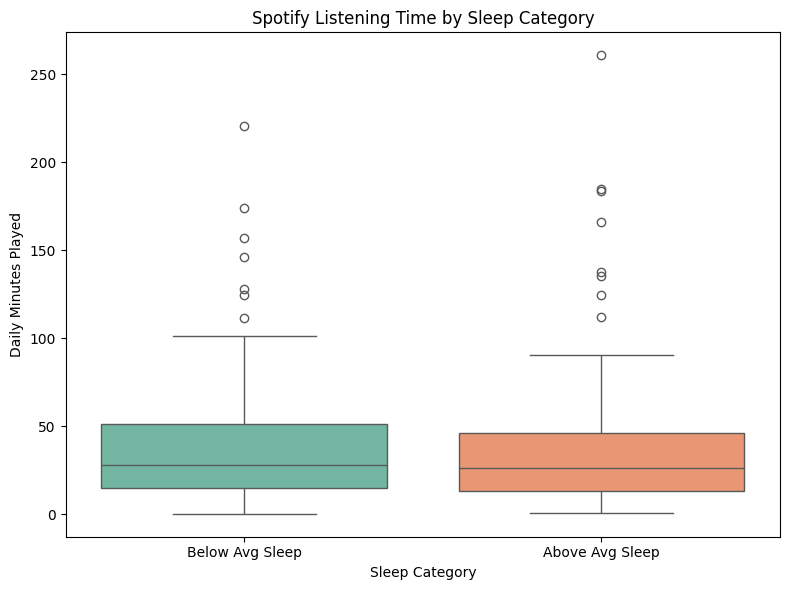

In [ ]:
# Add a Sleep Category column
merged_data['Sleep Category'] = merged_data['Sleep Duration (hours)'].apply(
    lambda x: 'Below Avg Sleep' if x < average_sleep else 'Above Avg Sleep'
)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Sleep Category',
    y='Daily Minutes Played',
    data=merged_data,
    palette='Set2'
)
plt.title("Spotify Listening Time by Sleep Category")
plt.xlabel("Sleep Category")
plt.ylabel("Daily Minutes Played")
plt.tight_layout()
plt.show()


Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency

# Step 1: Categorize Spotify Listening Time
median_listening_time = merged_data['Daily Minutes Played'].median()
merged_data['Spotify Listening Category'] = merged_data['Daily Minutes Played'].apply(
    lambda x: 'High' if x > median_listening_time else 'Low'
)

# Step 2: Create a Contingency Table
contingency_table = pd.crosstab(merged_data['Sleep Category'], merged_data['Spotify Listening Category'])
print("Contingency Table:")
print(contingency_table)

# Step 3: Perform Chi-Square Test
chi2_stat, chi2_p_value, chi2_dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {chi2_p_value:.4f}")
print(f"Degrees of Freedom: {chi2_dof}")


Contingency Table:
Spotify Listening Category  High  Low
Sleep Category                       
Above Avg Sleep               88   93
Below Avg Sleep               85   80

Chi-Square Test Results:
Chi-Square Statistic: 0.1854
P-Value: 0.6668
Degrees of Freedom: 1


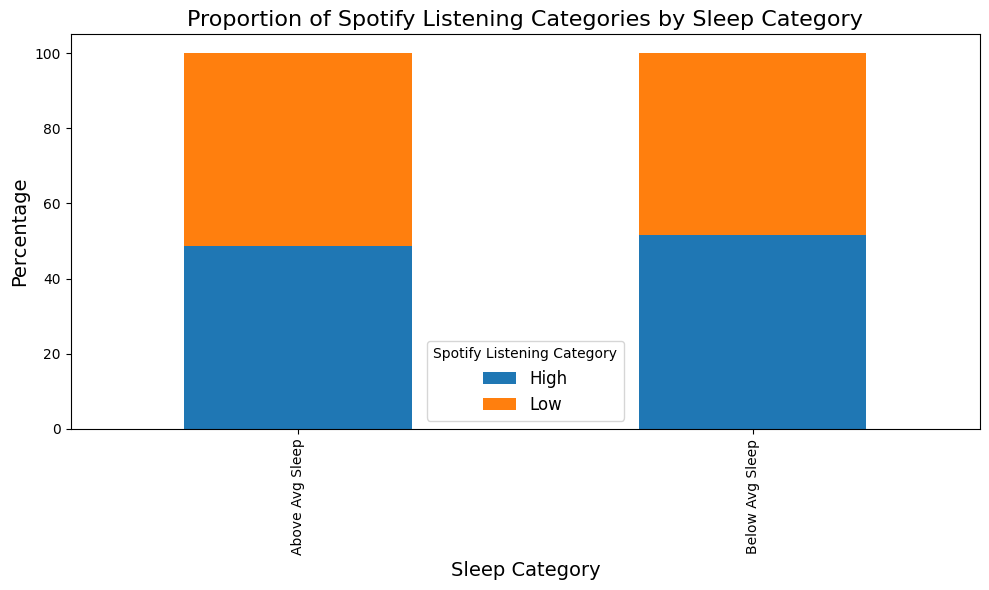

In [ ]:
# Normalize the contingency table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
contingency_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.title("Proportion of Spotify Listening Categories by Sleep Category", fontsize=16)
plt.xlabel("Sleep Category", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(title="Spotify Listening Category", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


Results

### Pearson Correlation
* Correlation Coefficient: 0.0068
* This indicates an extremely weak positive relationship between Sleep Duration (hours) and Daily Minutes Played.
* A value close to zero suggests little to no linear relationship between the two variables.
* P-Value: 0.8993
* Since the p-value is much greater than 0.05, the correlation is not statistically significant.

* Conclusion:

* * Sleep duration and Spotify listening time do not have a meaningful linear relationship.


###T-Test
* T-Statistic: 0.2015
* A small t-statistic indicates minimal difference between the means of Spotify listening time for below-average and above-average sleep groups.
* P-Value: 0.8404
* Since the p-value is much greater than 0.05, the difference in Spotify listening time between the two sleep categories is not statistically significant.
* Conclusion:

* * The amount of Spotify listening time does not significantly differ based on whether a person had below-average or above-average sleep.

###Chi-Square Test
* Contingency Table:
* High Spotify listening is almost equally distributed across sleep categories:
* * Above Avg Sleep: 88 (High), 93 (Low)
* * Below Avg Sleep: 85 (High), 80 (Low)
* Chi-Square Statistic: 0.1854
* This small value indicates that the observed counts are very close to the expected counts under the null hypothesis.
* P-Value: 0.6668
* Since the p-value is greater than 0.05, there is no statistically significant association between sleep categories and Spotify listening categories.
* Conclusion:

* * Sleep categories (below/above average) and Spotify listening categories (high/low) are not significantly associated.


### Summary of Findings

* Correlation:
* There is no meaningful or statistically significant linear relationship between sleep duration and Spotify listening time.
* Group Differences:
* * Spotify listening time is not significantly different between days of below-average and above-average sleep duration.
* Association:
* * Sleep categories (below/above average) do not significantly influence the likelihood of high or low Spotify listening.
* Practical Insight:

* * Spotify listening time and sleep behavior appear to be independent of each other in this dataset. There is no strong evidence to suggest that listening to music affects sleep duration or vice versa.

Regression

In [ ]:
import statsmodels.api as sm

# Define independent and dependent variables
X = merged_data['Daily Minutes Played']  # Independent variable
y = merged_data['Sleep Duration (hours)']  # Dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
regression_model = sm.OLS(y, X).fit()

# Display regression results
print(regression_model.summary())


                              OLS Regression Results                              
Dep. Variable:     Sleep Duration (hours)   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                   0.01605
Date:                    Fri, 10 Jan 2025   Prob (F-statistic):              0.899
Time:                            09:48:44   Log-Likelihood:                -422.28
No. Observations:                     346   AIC:                             848.6
Df Residuals:                         344   BIC:                             856.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Regression Summary

* R-squared: 0.000

* * This indicates that the model explains 0% of the variance in Sleep Duration (hours) based on Daily Minutes Played. In other words, Spotify listening time has no predictive power for sleep duration in this dataset.
* Adjusted R-squared: -0.003

* * The negative adjusted R-squared further confirms that adding the independent variable does not improve the model's explanatory power.
Coefficient for Daily Minutes Played: 0.0002

* * This suggests a very small positive effect of Spotify listening time on sleep duration, but the effect is negligible.
* P-value for Daily Minutes Played: 0.899

* * The high p-value (> 0.05) indicates that the relationship is not statistically significant.
* Intercept: 6.1935

* * The model predicts an average sleep duration of 6.19 hours when no Spotify time is recorded.

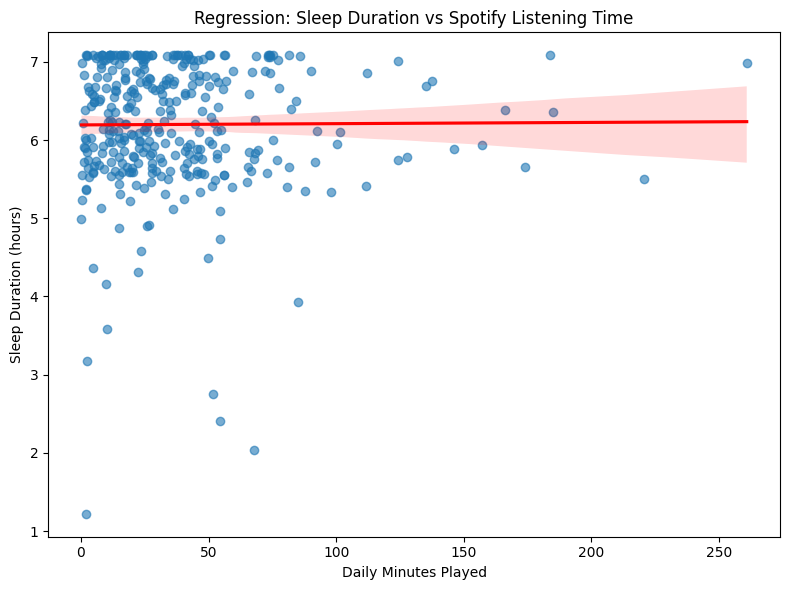

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Daily Minutes Played',
    y='Sleep Duration (hours)',
    data=merged_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Regression: Sleep Duration vs Spotify Listening Time")
plt.xlabel("Daily Minutes Played")
plt.ylabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()


Scatter Plot with Regression Line

* The scatter plot shows a random spread of points with no clear trend or pattern.
* The regression line is almost flat, confirming the weak and insignificant relationship between Spotify listening time and sleep duration.
* The confidence interval (shaded area) around the regression line is wide, indicating a lack of confidence in the fit.

Conclusions

* Relationship:


* *  There is no meaningful relationship between Spotify listening time and sleep duration in this dataset.
* Predictive Power:

* * Spotify listening time is not a useful predictor of sleep duration, as evidenced by the near-zero R-squared value and insignificant p-value.
* Practical Insight:

* * Music listening time does not appear to influence sleep behavior in a measurable way. Other factors might be more important in determining sleep duration.


Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data
X = merged_data[['Daily Minutes Played']]  # Features
y = merged_data['Sleep Duration (hours)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error (MSE): 1.0134
R-squared: -0.0514


Model Performance


* Mean Squared Error (MSE): 1.0134

* * This value indicates the average squared difference between the actual and predicted sleep duration. A high MSE suggests that the predictions deviate significantly from the actual values, indicating poor model performance.
* R-squared: -0.0514

* * A negative R-squared value indicates that the model performs worse than simply predicting the mean sleep duration for all observations. This suggests that the Daily Minutes Played feature does not contribute meaningfully to predicting sleep duration.


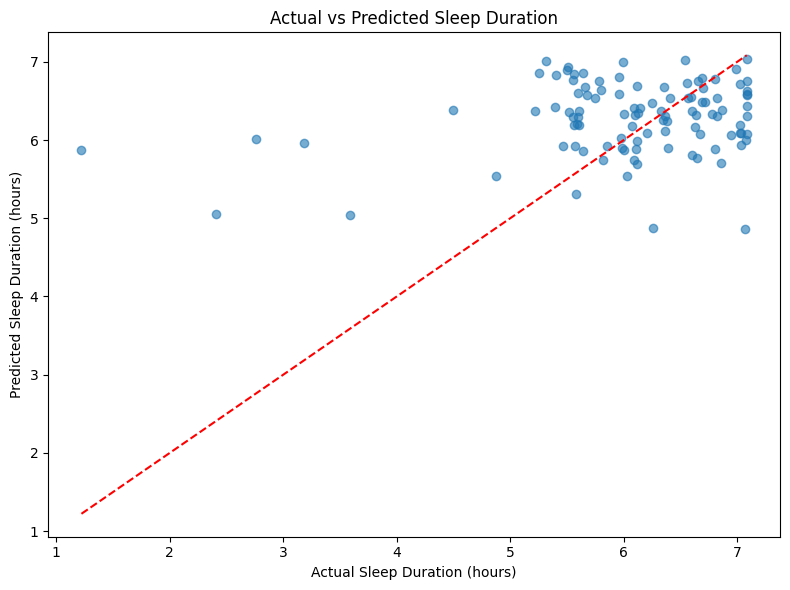

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Sleep Duration")
plt.xlabel("Actual Sleep Duration (hours)")
plt.ylabel("Predicted Sleep Duration (hours)")
plt.tight_layout()
plt.show()


Visualization: Actual vs. Predicted Sleep Duration

*  The scatter plot shows:


*  *  Points are widely scattered around the diagonal red line, indicating poor agreement between the actual and predicted values.
*  *  Many predicted values deviate significantly from the actual sleep durations, further confirming poor model performance.
*  *  The random forest model fails to capture meaningful patterns between Spotify listening time and sleep duration.

Conclusion


* Relationship:

* * The Random Forest model confirms the results of the regression and statistical tests: there is no meaningful relationship between Daily Minutes Played and Sleep Duration.

* Predictive Power:

* * The feature Daily Minutes Played is not useful for predicting sleep duration, as evidenced by the poor MSE and negative R-squared.
